In [1]:
# import some libraries for data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from nltk.corpus import stopwords
%matplotlib inline

In [28]:
# Read the train dataset 
_df = pd.read_csv('train.csv', index_col=False)
_df.head(2)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,id
0,Portugal,This is a fine rich balanced wine. It has ripe...,Vila Santa Reserva,88.870874,20.0,Alentejano,NaN,NaN,NaN,NaN,NaN,PORTUGUESE RED,J. Portugal Ramos,32027
1,France,"A solid, chunky wine, with a structure that is...",NaN,88.041695,28.0,Bordeaux,Lalande de Pomerol,NaN,NaN,NaN,NaN,BORDEAUX-STYLE RED BLEND,Château Tour Grand Colombier,71079


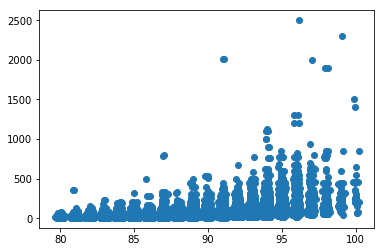

In [29]:
# We try to create a scatter plot of the only 2 numeric features in the dataset
plt.scatter(_df.points, _df.price)
plt.show()

In [30]:
# Create a subset dataset that has price less than or equal to 1000
_df_1000 = _df[_df.price <= 1000]
_df_1000.shape 

(174984, 14)

In [31]:
# Import your test dataset 
_test_df2 = pd.read_csv('test.csv', index_col=False)
_test_df2=_test_df2.drop('index', axis = 1)
_test_df2.head(2)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,id
0,US,"Sweet new oak stands out, giving this Cabernet...",3D,95.036469,NaN,California,St. Helena,Napa,NaN,NaN,Salvestrin 2007 3D Cabernet Sauvignon (St. Hel...,CABERNET SAUVIGNON,Salvestrin,0
1,France,Charming raspberry aromas intertwine with scen...,Heluicum,90.966405,NaN,Rhône Valley,Collines Rhôdaniennes,NaN,NaN,NaN,NaN,SYRAH,Les Vins de Vienne,1


In [32]:
#drop all null values in the country and variety column
_df_1000=_df_1000.dropna(subset = ['country','variety'])

In [33]:
_df_1000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174936 entries, 0 to 174999
Data columns (total 14 columns):
country                  174936 non-null object
description              174936 non-null object
designation              122690 non-null object
points                   174936 non-null float64
price                    174936 non-null float64
province                 174936 non-null object
region_1                 146452 non-null object
region_2                 75392 non-null object
taster_name              65457 non-null object
taster_twitter_handle    62138 non-null object
title                    82136 non-null object
variety                  174936 non-null object
winery                   174936 non-null object
id                       174936 non-null int64
dtypes: float64(2), int64(1), object(11)
memory usage: 20.0+ MB


In [34]:
data_conc = pd.concat([_df_1000,_test_df2])

# looking at the data

In [35]:
cols_drop = ['description','designation','region_1','region_2', 'taster_name', 'taster_twitter_handle','title', 'winery','id']

In [36]:
_data_aftr_drop = pd.get_dummies(data_conc, columns = ['country'])
_data_aftr_drop = pd.get_dummies(_data_aftr_drop, columns = ['province'])
_data_aftr_drop = pd.get_dummies(_data_aftr_drop, columns = ['variety'])


In [37]:
_data_aftr_drop = _data_aftr_drop.drop(cols_drop, axis =1)


In [39]:
_data_aftr_drop.shape

(258146, 1275)

In [43]:
#split the dataset into train and test set
labels = _data_aftr_drop[_df_1000.shape[0]:]
predictors = _data_aftr_drop[:_df_1000.shape[0]]

In [44]:
predictors.tail(2)

,points,price,country_Albania,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Bosnia and Herzegovina,country_Brazil,country_Bulgaria,...,variety_XYNISTERI,variety_YAPINCAK,variety_ZIBIBBO,variety_ZIERFANDLER,variety_ZIERFANDLER-ROTGIPFLER,variety_ZINFANDEL,variety_ZLAHTINA,variety_ZWEIGELT,variety_ÇALKARASı,variety_ŽILAVKA
174998,90.867770,65.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
174999,91.881217,50.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# Sample the dataset 80% train, 20% test
_train_df = predictors.sample(frac = 0.8)
_val_df = predictors.drop(_train_df.index)

In [46]:
# Create the train and test sets
X_train = _train_df.drop('price', axis = 1).values
y_train = _train_df['price'].values
X_test = _val_df.drop('price', axis = 1).values
y_test = _val_df['price'].values

In [47]:
print(X_train.shape, y_train.shape)
print(X_test.shape,y_test.shape)

(139949, 1274) (139949,)
(34987, 1274) (34987,)


In [48]:
# Import an error metric
# Import Linear Regression for training since the task is of continuous output
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [49]:
# Try a Linear Regression again
lr_1 = LinearRegression()
lr_1.fit(X_train, y_train)
y_pred2 = lr_1.predict(X_test)
mse = mean_squared_error(y_test, y_pred2)
print(np.sqrt(mse))

29.317189418379034


# Using a Tree model to train

In [50]:
# Import Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

In [51]:
# Instantiate the Decision Tree class with or without a max_depth
tree = DecisionTreeRegressor(max_depth=5)
# Fit the model
tree.fit(X_train, y_train)
# Predict using the model
y_pred_3 = tree.predict(X_test)


In [52]:
# Get the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred_3))
print(rmse)

27.434642447971875


#  Random Forest Regressor

In [53]:

from sklearn.ensemble import RandomForestRegressor

In [54]:
# Instantiate a forest regressor
forest = RandomForestRegressor(n_estimators=100, max_depth=7)
# Train a regressor model
forest.fit(X_train, y_train)
# Predict on the model
y_pred_4 = forest.predict(X_test)

In [55]:
rmse4 = np.sqrt(mean_squared_error(y_test, y_pred_4))
print(rmse4)


25.867943802134164


In [59]:
data = {'true': y_test, 'prediced': y_pred_4}
pd.DataFrame.from_dict(data).head(3)

,true,prediced
0,20.0,28.553098
1,28.0,24.978119
2,38.0,33.468512


In [60]:
# Predict the price using the points feature
forest.predict(labels.drop('price', axis = 1).values)

array([105.76259728,  37.38820648,  29.82907229, ...,  31.12600194,
        17.72220235,  52.73138337])

In [62]:
# Extract the two columns needed for the competition submission and save as a csv file
pd.Series(forest.predict(labels.drop('price', axis = 1).values),name=('price')).to_csv('Kaggle_4_copy1.csv', index=True)

# Support vector regression

In [54]:
from sklearn.svm import SVR

In [57]:
svr_model = SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
# Train a regressor model
svr_model.fit(X_train,y_train)

In [ ]:
# Predict on the model
y_pred_svr = svr_model.predict(X_test)

In [ ]:
data = {'true': y_test, 'prediced': y_pred_svr}
pd.DataFrame.from_dict(data)